# Importing necessary libraries

In [11]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import plotly.express as px

# Importing dataset

In [13]:
data=pd.read_csv("Crop Yield.csv")
print(data)

        State_Name District_Name  Crop_Year       Season    Crop  Area  \
0    Uttar Pradesh       ALIGARH       2005  Whole Year   Banana     2   
1    Uttar Pradesh       ALIGARH       2008  Summer       Banana     2   
2    Uttar Pradesh       ALIGARH       2009  Summer       Banana     1   
3    Uttar Pradesh       ALIGARH       2012  Summer       Banana     1   
4    Uttar Pradesh       ALIGARH       2013  Summer       Banana     1   
..             ...           ...        ...          ...     ...   ...   
264  Uttar Pradesh     SULTANPUR       2014  Summer       Banana    11   
265  Uttar Pradesh         UNNAO       2004  Whole Year   Banana     1   
266  Uttar Pradesh         UNNAO       2006  Whole Year   Banana     1   
267  Uttar Pradesh         UNNAO       2013  Summer       Banana    17   
268  Uttar Pradesh         UNNAO       2014  Summer       Banana     4   

     Fertilizer  Pesticide  tempmax  tempmin  humidity  precip  windspeed  \
0     255675.42     440.44      0.

# Data cleaning

# Handling missing values

In [14]:
data.head()

State_Name District_Name  Crop_Year       Season    Crop  Area  \
0  Uttar Pradesh       ALIGARH       2005  Whole Year   Banana     2   
1  Uttar Pradesh       ALIGARH       2008  Summer       Banana     2   
2  Uttar Pradesh       ALIGARH       2009  Summer       Banana     1   
3  Uttar Pradesh       ALIGARH       2012  Summer       Banana     1   
4  Uttar Pradesh       ALIGARH       2013  Summer       Banana     1   

   Fertilizer  Pesticide  tempmax  tempmin  humidity  precip  windspeed  \
0   255675.42     440.44      0.0      0.0       NaN     NaN        NaN   
1   284792.64     179.19      0.0      0.0       NaN     NaN        NaN   
2   363995.52     397.12      0.0      0.0       NaN     NaN        NaN   
3   364356.00     717.75     20.9     11.9      76.3    24.4       16.9   
4   355737.20     731.29     19.1      3.1      46.9     0.0       12.6   

   solarradiation  solarenergy  uvindex  Production  
0             NaN          NaN      NaN          77  
1             NaN          NaN      NaN          77  
2             NaN          NaN      NaN          41  
3           146.5         12.7      6.0          45  
4           162.5         14.1      6.0          44

In [15]:
a=data.isnull()
a.head()

State_Name  District_Name  Crop_Year  Season   Crop   Area  Fertilizer  \
0       False          False      False   False  False  False       False   
1       False          False      False   False  False  False       False   
2       False          False      False   False  False  False       False   
3       False          False      False   False  False  False       False   
4       False          False      False   False  False  False       False   

   Pesticide  tempmax  tempmin  humidity  precip  windspeed  solarradiation  \
0      False    False    False      True    True       True            True   
1      False    False    False      True    True       True            True   
2      False    False    False      True    True       True            True   
3      False    False    False     False   False      False           False   
4      False    False    False     False   False      False           False   

   solarenergy  uvindex  Production  
0         True     True       False  
1         True     True       False  
2         True     True       False  
3        False    False       False  
4        False    False       False

In [16]:
b=data.isnull().sum()
print(b)

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Fertilizer        255
Pesticide         255
tempmax             9
tempmin             9
humidity           81
precip             91
windspeed          83
solarradiation    160
solarenergy       160
uvindex           160
Production          0
dtype: int64


In [17]:
for column in data.columns:
    if data[column].dtype != 'object':
        data[column].fillna(data[column].mean(), inplace=True)
    else:
        data[column].fillna(data[column].mode()[0], inplace=True)


In [18]:
data

State_Name District_Name  Crop_Year       Season    Crop  Area  \
0    Uttar Pradesh       ALIGARH       2005  Whole Year   Banana     2   
1    Uttar Pradesh       ALIGARH       2008  Summer       Banana     2   
2    Uttar Pradesh       ALIGARH       2009  Summer       Banana     1   
3    Uttar Pradesh       ALIGARH       2012  Summer       Banana     1   
4    Uttar Pradesh       ALIGARH       2013  Summer       Banana     1   
..             ...           ...        ...          ...     ...   ...   
264  Uttar Pradesh     SULTANPUR       2014  Summer       Banana    11   
265  Uttar Pradesh         UNNAO       2004  Whole Year   Banana     1   
266  Uttar Pradesh         UNNAO       2006  Whole Year   Banana     1   
267  Uttar Pradesh         UNNAO       2013  Summer       Banana    17   
268  Uttar Pradesh         UNNAO       2014  Summer       Banana     4   

       Fertilizer    Pesticide  tempmax  tempmin   humidity     precip  \
0    2.556754e+05   440.440000      0.0      0.0  73.328191   4.681556   
1    2.847926e+05   179.190000      0.0      0.0  73.328191   4.681556   
2    3.639955e+05   397.120000      0.0      0.0  73.328191   4.681556   
3    3.643560e+05   717.750000     20.9     11.9  76.300000  24.400000   
4    3.557372e+05   731.290000     19.1      3.1  46.900000   0.000000   
..            ...          ...      ...      ...        ...        ...   
264  2.774931e+06  6094.207143     23.4     11.7  73.400000   0.000000   
265  2.774931e+06  6094.207143     14.1      8.1  83.800000   0.000000   
266  2.774931e+06  6094.207143     28.1     10.1  69.300000   0.000000   
267  2.774931e+06  6094.207143     20.1      7.0  63.100000   0.000000   
268  2.774931e+06  6094.207143     23.0     12.0  80.600000   0.000000   

     windspeed  solarradiation  solarenergy   uvindex  Production  
0    12.666667      128.761468    11.116514  5.247706          77  
1    12.666667      128.761468    11.116514  5.247706          77  
2    12.666667      128.761468    11.116514  5.247706          41  
3    16.900000      146.500000    12.700000  6.000000          45  
4    12.600000      162.500000    14.100000  6.000000          44  
..         ...             ...          ...       ...         ...  
264  18.000000      132.600000    11.300000  5.000000         496  
265   5.400000      128.761468    11.116514  5.247706          36  
266   7.600000      128.761468    11.116514  5.247706          39  
267   9.400000      136.300000    11.800000  5.000000         740  
268  14.800000      113.600000     9.600000  4.000000         180  

[269 rows x 17 columns]

In [19]:
c=data.isnull().sum()
print(c)

State_Name        0
District_Name     0
Crop_Year         0
Season            0
Crop              0
Area              0
Fertilizer        0
Pesticide         0
tempmax           0
tempmin           0
humidity          0
precip            0
windspeed         0
solarradiation    0
solarenergy       0
uvindex           0
Production        0
dtype: int64


# Removing outliers

In [20]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
Data = data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]


In [21]:
Data

State_Name   District_Name  Crop_Year       Season    Crop  Area  \
14   Uttar Pradesh  AMBEDKAR NAGAR       2009  Summer       Banana     6   
17   Uttar Pradesh         AURAIYA       2005  Whole Year   Banana     1   
18   Uttar Pradesh         AURAIYA       2008  Summer       Banana     1   
19   Uttar Pradesh         AURAIYA       2009  Summer       Banana    12   
23   Uttar Pradesh        AZAMGARH       2004  Whole Year   Banana     8   
..             ...             ...        ...          ...     ...   ...   
261  Uttar Pradesh       SULTANPUR       2008  Summer       Banana    10   
262  Uttar Pradesh       SULTANPUR       2009  Summer       Banana    22   
263  Uttar Pradesh       SULTANPUR       2011  Summer       Banana    27   
265  Uttar Pradesh           UNNAO       2004  Whole Year   Banana     1   
266  Uttar Pradesh           UNNAO       2006  Whole Year   Banana     1   

       Fertilizer    Pesticide    tempmax    tempmin   humidity    precip  \
14   2.774931e+06  6094.207143  18.700000   8.900000  79.100000  0.000000   
17   2.774931e+06  6094.207143   0.000000   0.000000  73.328191  4.681556   
18   2.774931e+06  6094.207143   0.000000   0.000000  73.328191  4.681556   
19   2.774931e+06  6094.207143   0.000000   0.000000  73.328191  4.681556   
23   2.774931e+06  6094.207143  13.100000   5.100000  89.500000  0.000000   
..            ...          ...        ...        ...        ...       ...   
261  2.774931e+06  6094.207143   0.000000   0.000000  73.328191  4.681556   
262  2.774931e+06  6094.207143   0.000000   0.000000  73.328191  4.681556   
263  2.774931e+06  6094.207143  14.794231   6.968846  73.328191  4.681556   
265  2.774931e+06  6094.207143  14.100000   8.100000  83.800000  0.000000   
266  2.774931e+06  6094.207143  28.100000  10.100000  69.300000  0.000000   

     windspeed  solarradiation  solarenergy   uvindex  Production  
14    3.600000      128.761468    11.116514  5.247706         246  
17   12.666667      128.761468    11.116514  5.247706          38  
18   12.666667      128.761468    11.116514  5.247706          38  
19   12.666667      128.761468    11.116514  5.247706         493  
23    7.600000      128.761468    11.116514  5.247706         291  
..         ...             ...          ...       ...         ...  
261  12.666667      128.761468    11.116514  5.247706         381  
262  12.666667      128.761468    11.116514  5.247706         905  
263  12.666667      128.761468    11.116514  5.247706        1180  
265   5.400000      128.761468    11.116514  5.247706          36  
266   7.600000      128.761468    11.116514  5.247706          39  

[116 rows x 17 columns]

# Creating dependent and independent variables

In [22]:
#independent variable
X = Data.drop('Production', axis=1)
print(X)

        State_Name   District_Name  Crop_Year       Season    Crop  Area  \
14   Uttar Pradesh  AMBEDKAR NAGAR       2009  Summer       Banana     6   
17   Uttar Pradesh         AURAIYA       2005  Whole Year   Banana     1   
18   Uttar Pradesh         AURAIYA       2008  Summer       Banana     1   
19   Uttar Pradesh         AURAIYA       2009  Summer       Banana    12   
23   Uttar Pradesh        AZAMGARH       2004  Whole Year   Banana     8   
..             ...             ...        ...          ...     ...   ...   
261  Uttar Pradesh       SULTANPUR       2008  Summer       Banana    10   
262  Uttar Pradesh       SULTANPUR       2009  Summer       Banana    22   
263  Uttar Pradesh       SULTANPUR       2011  Summer       Banana    27   
265  Uttar Pradesh           UNNAO       2004  Whole Year   Banana     1   
266  Uttar Pradesh           UNNAO       2006  Whole Year   Banana     1   

       Fertilizer    Pesticide    tempmax    tempmin   humidity    precip  \
14   2.774

In [23]:
#Dependent variable
y = Data['Production']
print(y)

14      246
17       38
18       38
19      493
23      291
       ... 
261     381
262     905
263    1180
265      36
266      39
Name: Production, Length: 116, dtype: int64


# Exploratory data analysis(EDA)

In [24]:
Data.nunique()

State_Name         1
District_Name     39
Crop_Year          6
Season             2
Crop               1
Area              32
Fertilizer         1
Pesticide          1
tempmax           19
tempmin           19
humidity          22
precip             2
windspeed         10
solarradiation     1
solarenergy        1
uvindex            1
Production        61
dtype: int64

In [25]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 14 to 266
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State_Name      116 non-null    object 
 1   District_Name   116 non-null    object 
 2   Crop_Year       116 non-null    int64  
 3   Season          116 non-null    object 
 4   Crop            116 non-null    object 
 5   Area            116 non-null    int64  
 6   Fertilizer      116 non-null    float64
 7   Pesticide       116 non-null    float64
 8   tempmax         116 non-null    float64
 9   tempmin         116 non-null    float64
 10  humidity        116 non-null    float64
 11  precip          116 non-null    float64
 12  windspeed       116 non-null    float64
 13  solarradiation  116 non-null    float64
 14  solarenergy     116 non-null    float64
 15  uvindex         116 non-null    float64
 16  Production      116 non-null    int64  
dtypes: float64(10), int64(3), object(4

# Univariate Analysis 
Data.describe()

In [27]:
# Select numerical columns for visualization
numerical_columns = ['Area', 'tempmax', 'tempmin', 'humidity', 'precip', 'windspeed', 'solarradiation', 'solarenergy', 'uvindex', 'Production']
numerical_columns

['Area',
 'tempmax',
 'tempmin',
 'humidity',
 'precip',
 'windspeed',
 'solarradiation',
 'solarenergy',
 'uvindex',
 'Production']

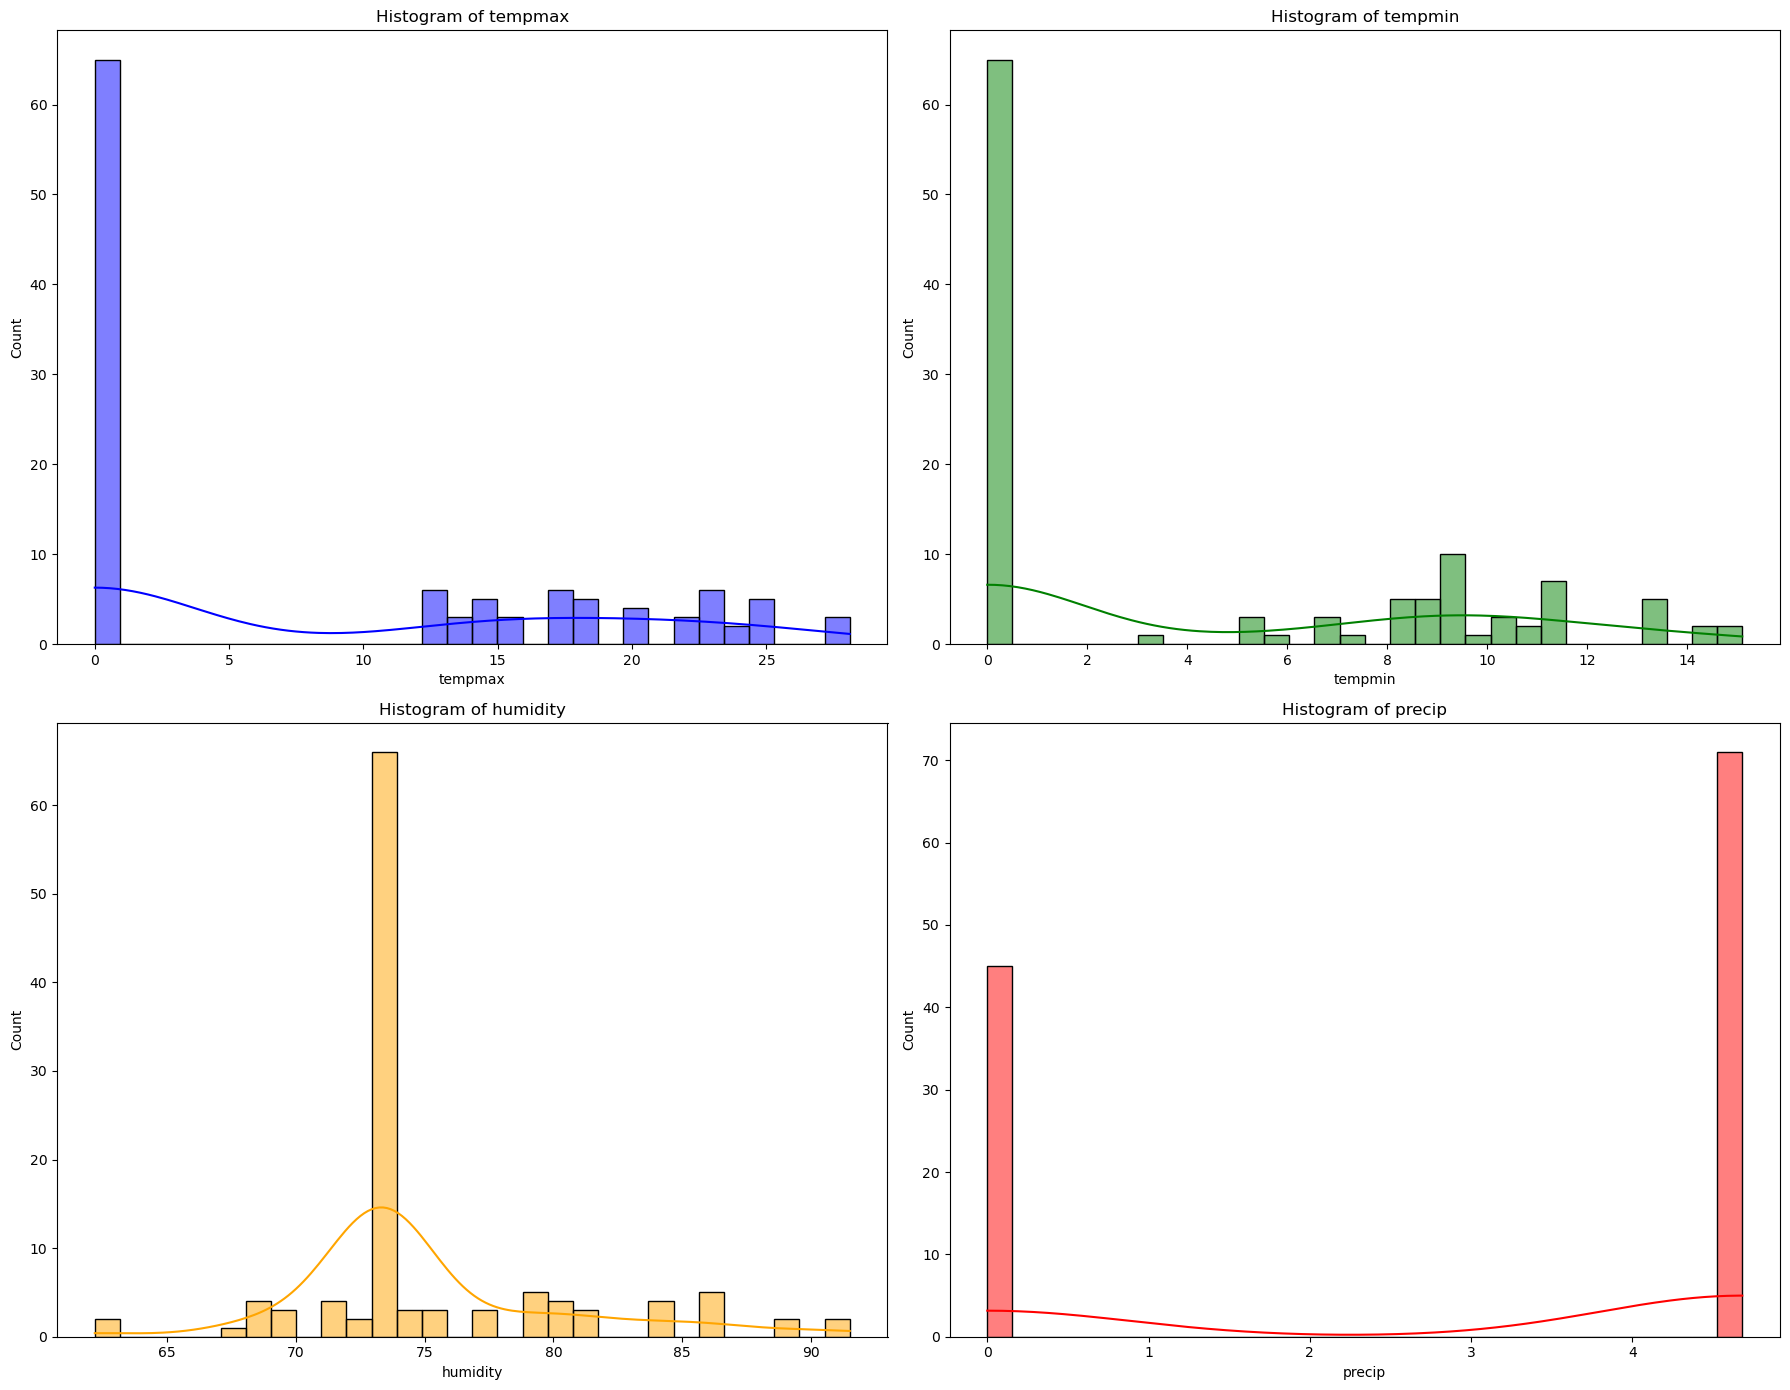

In [28]:
# Set up subplots for visualization
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 14))

# First histogram
sns.histplot(x='tempmax', data=Data, ax=axes[0, 0], bins=30, kde=True, color='blue')
axes[0, 0].set_title('Histogram of tempmax')

# Second histogram
sns.histplot(x='tempmin', data=Data, ax=axes[0, 1], bins=30, kde=True, color='green')
axes[0, 1].set_title('Histogram of tempmin')

# Third histogram
sns.histplot(x='humidity', data=Data, ax=axes[1, 0], bins=30, kde=True, color='orange')
axes[1, 0].set_title('Histogram of humidity')

# Fourth histogram
sns.histplot(x='precip', data=Data, ax=axes[1, 1], bins=30, kde=True, color='red')
axes[1, 1].set_title('Histogram of precip')

# Display the plot
plt.tight_layout()
plt.show()



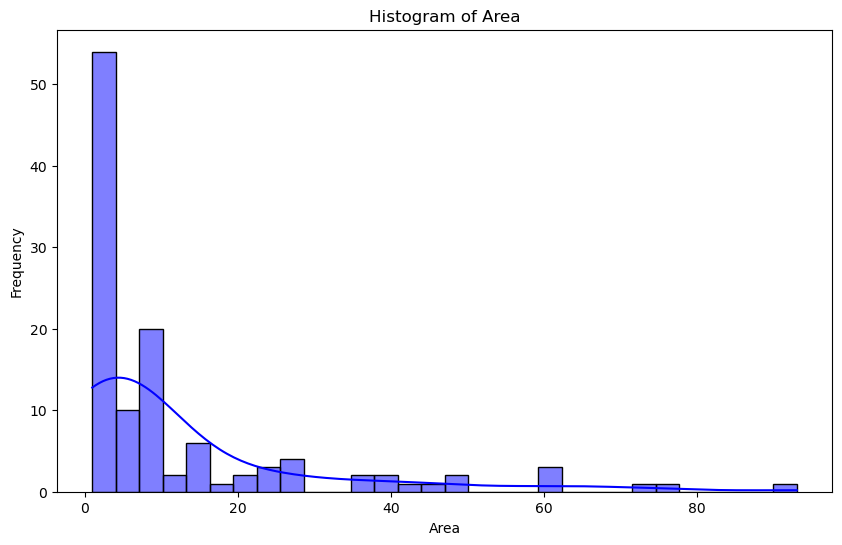

In [29]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(Data['Area'], bins=30, kde=True, color='blue')
plt.title('Histogram of Area')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.show()

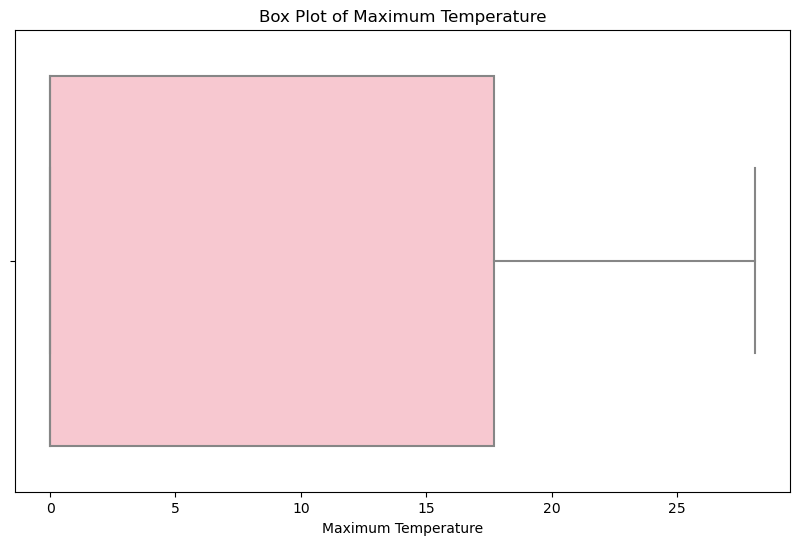

In [30]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(Data['tempmax'], color='pink')
plt.title('Box Plot of Maximum Temperature')
plt.xlabel('Maximum Temperature')
plt.show()


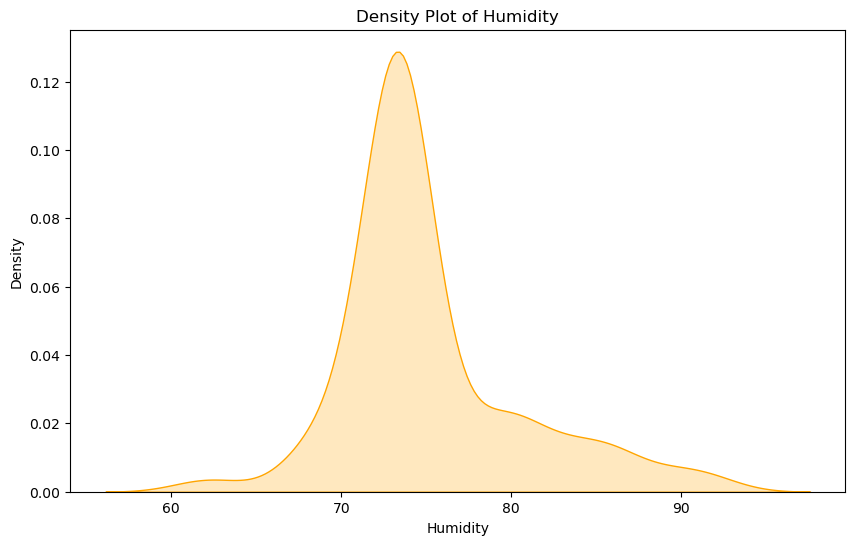

In [31]:
# Density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(Data['humidity'], shade=True, color='orange')
plt.title('Density Plot of Humidity')
plt.xlabel('Humidity')
plt.ylabel('Density')
plt.show()

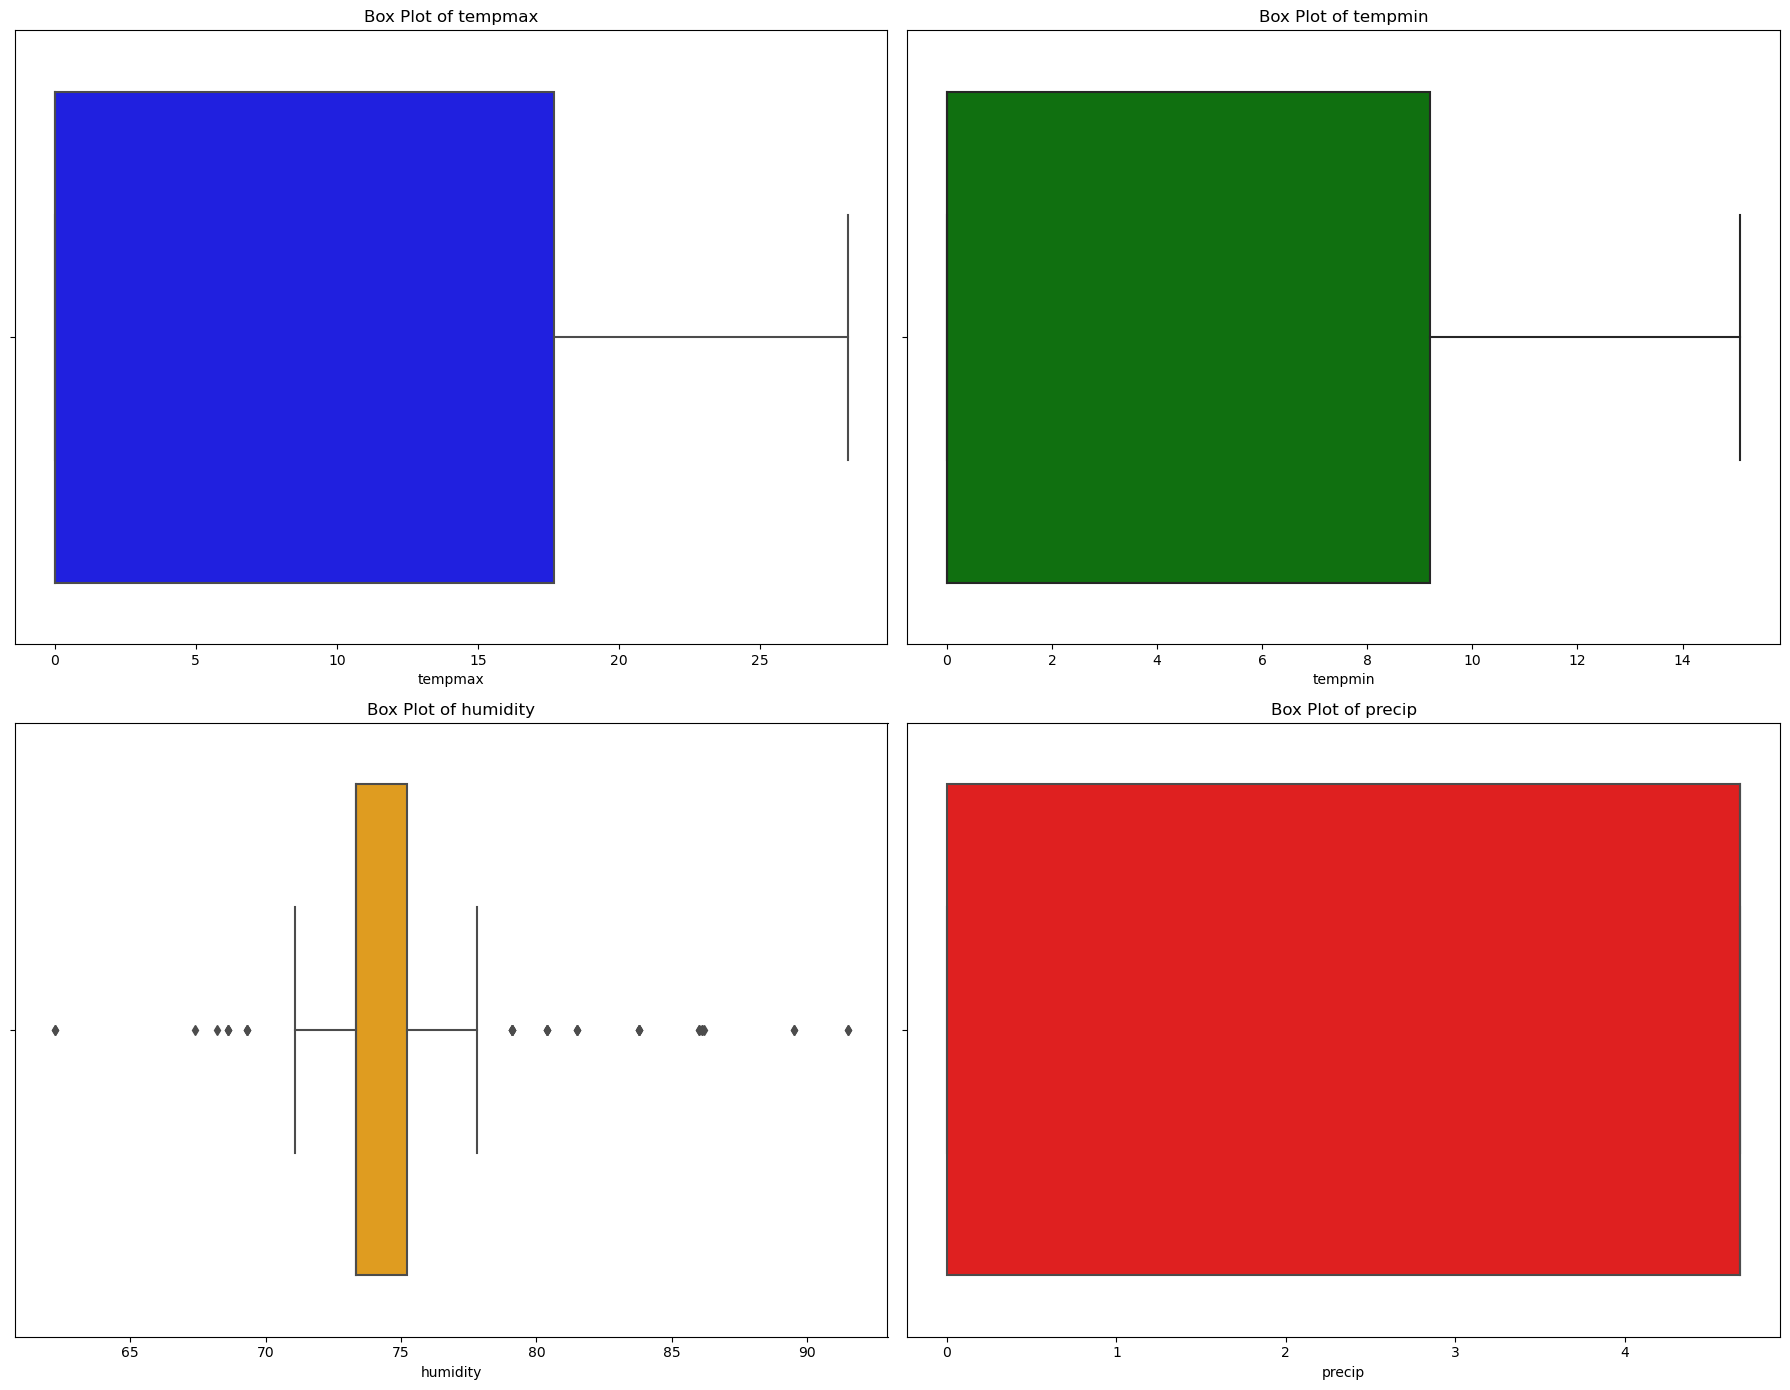

In [32]:
# Set up subplots for visualization
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 14))

# First box plot
sns.boxplot(x='tempmax', data=Data, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Box Plot of tempmax')

# Second box plot
sns.boxplot(x='tempmin', data=Data, ax=axes[0, 1], color='green')
axes[0, 1].set_title('Box Plot of tempmin')

# Third box plot
sns.boxplot(x='humidity', data=Data, ax=axes[1, 0], color='orange')
axes[1, 0].set_title('Box Plot of humidity')

# Fourth box plot
sns.boxplot(x='precip', data=Data, ax=axes[1, 1], color='red')
axes[1, 1].set_title('Box Plot of precip')

# Display the plot
plt.tight_layout()
plt.show()


In [33]:
#There are outliers in humidity and precip column so firstly i will removed that outliers

In [34]:
#Boxplot
fig = px.box(Data, x='precip', y='humidity', title='Box plot of humidity vs production')
fig.update_layout(xaxis_title='humidity', yaxis_title='precip')
fig.show()

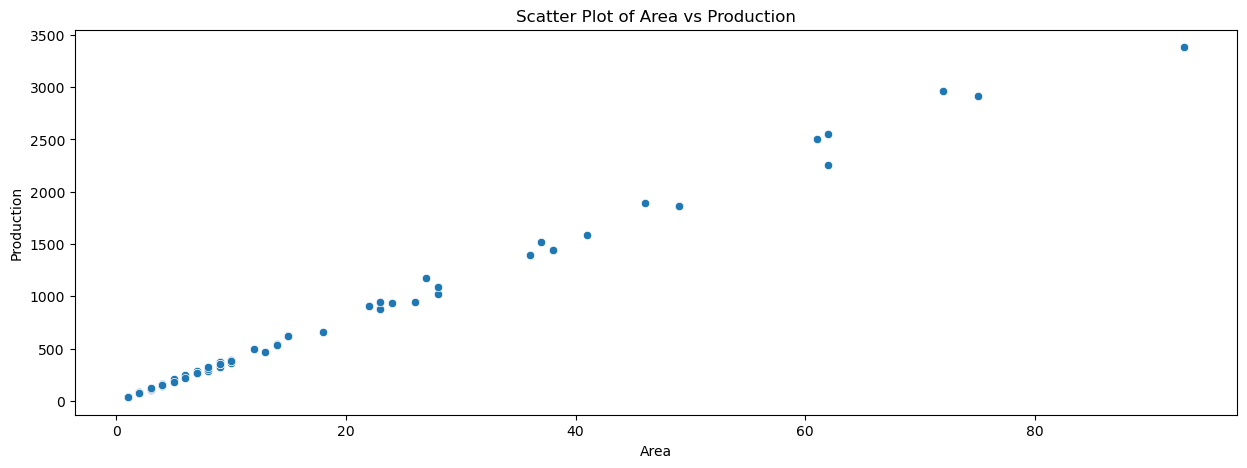

In [35]:
# Scatter plot
plt.figure(figsize=(15, 5))
sns.scatterplot(x='Area', y='Production', data=Data)
plt.title('Scatter Plot of Area vs Production')
plt.xlabel('Area')
plt.ylabel('Production')
plt.show()

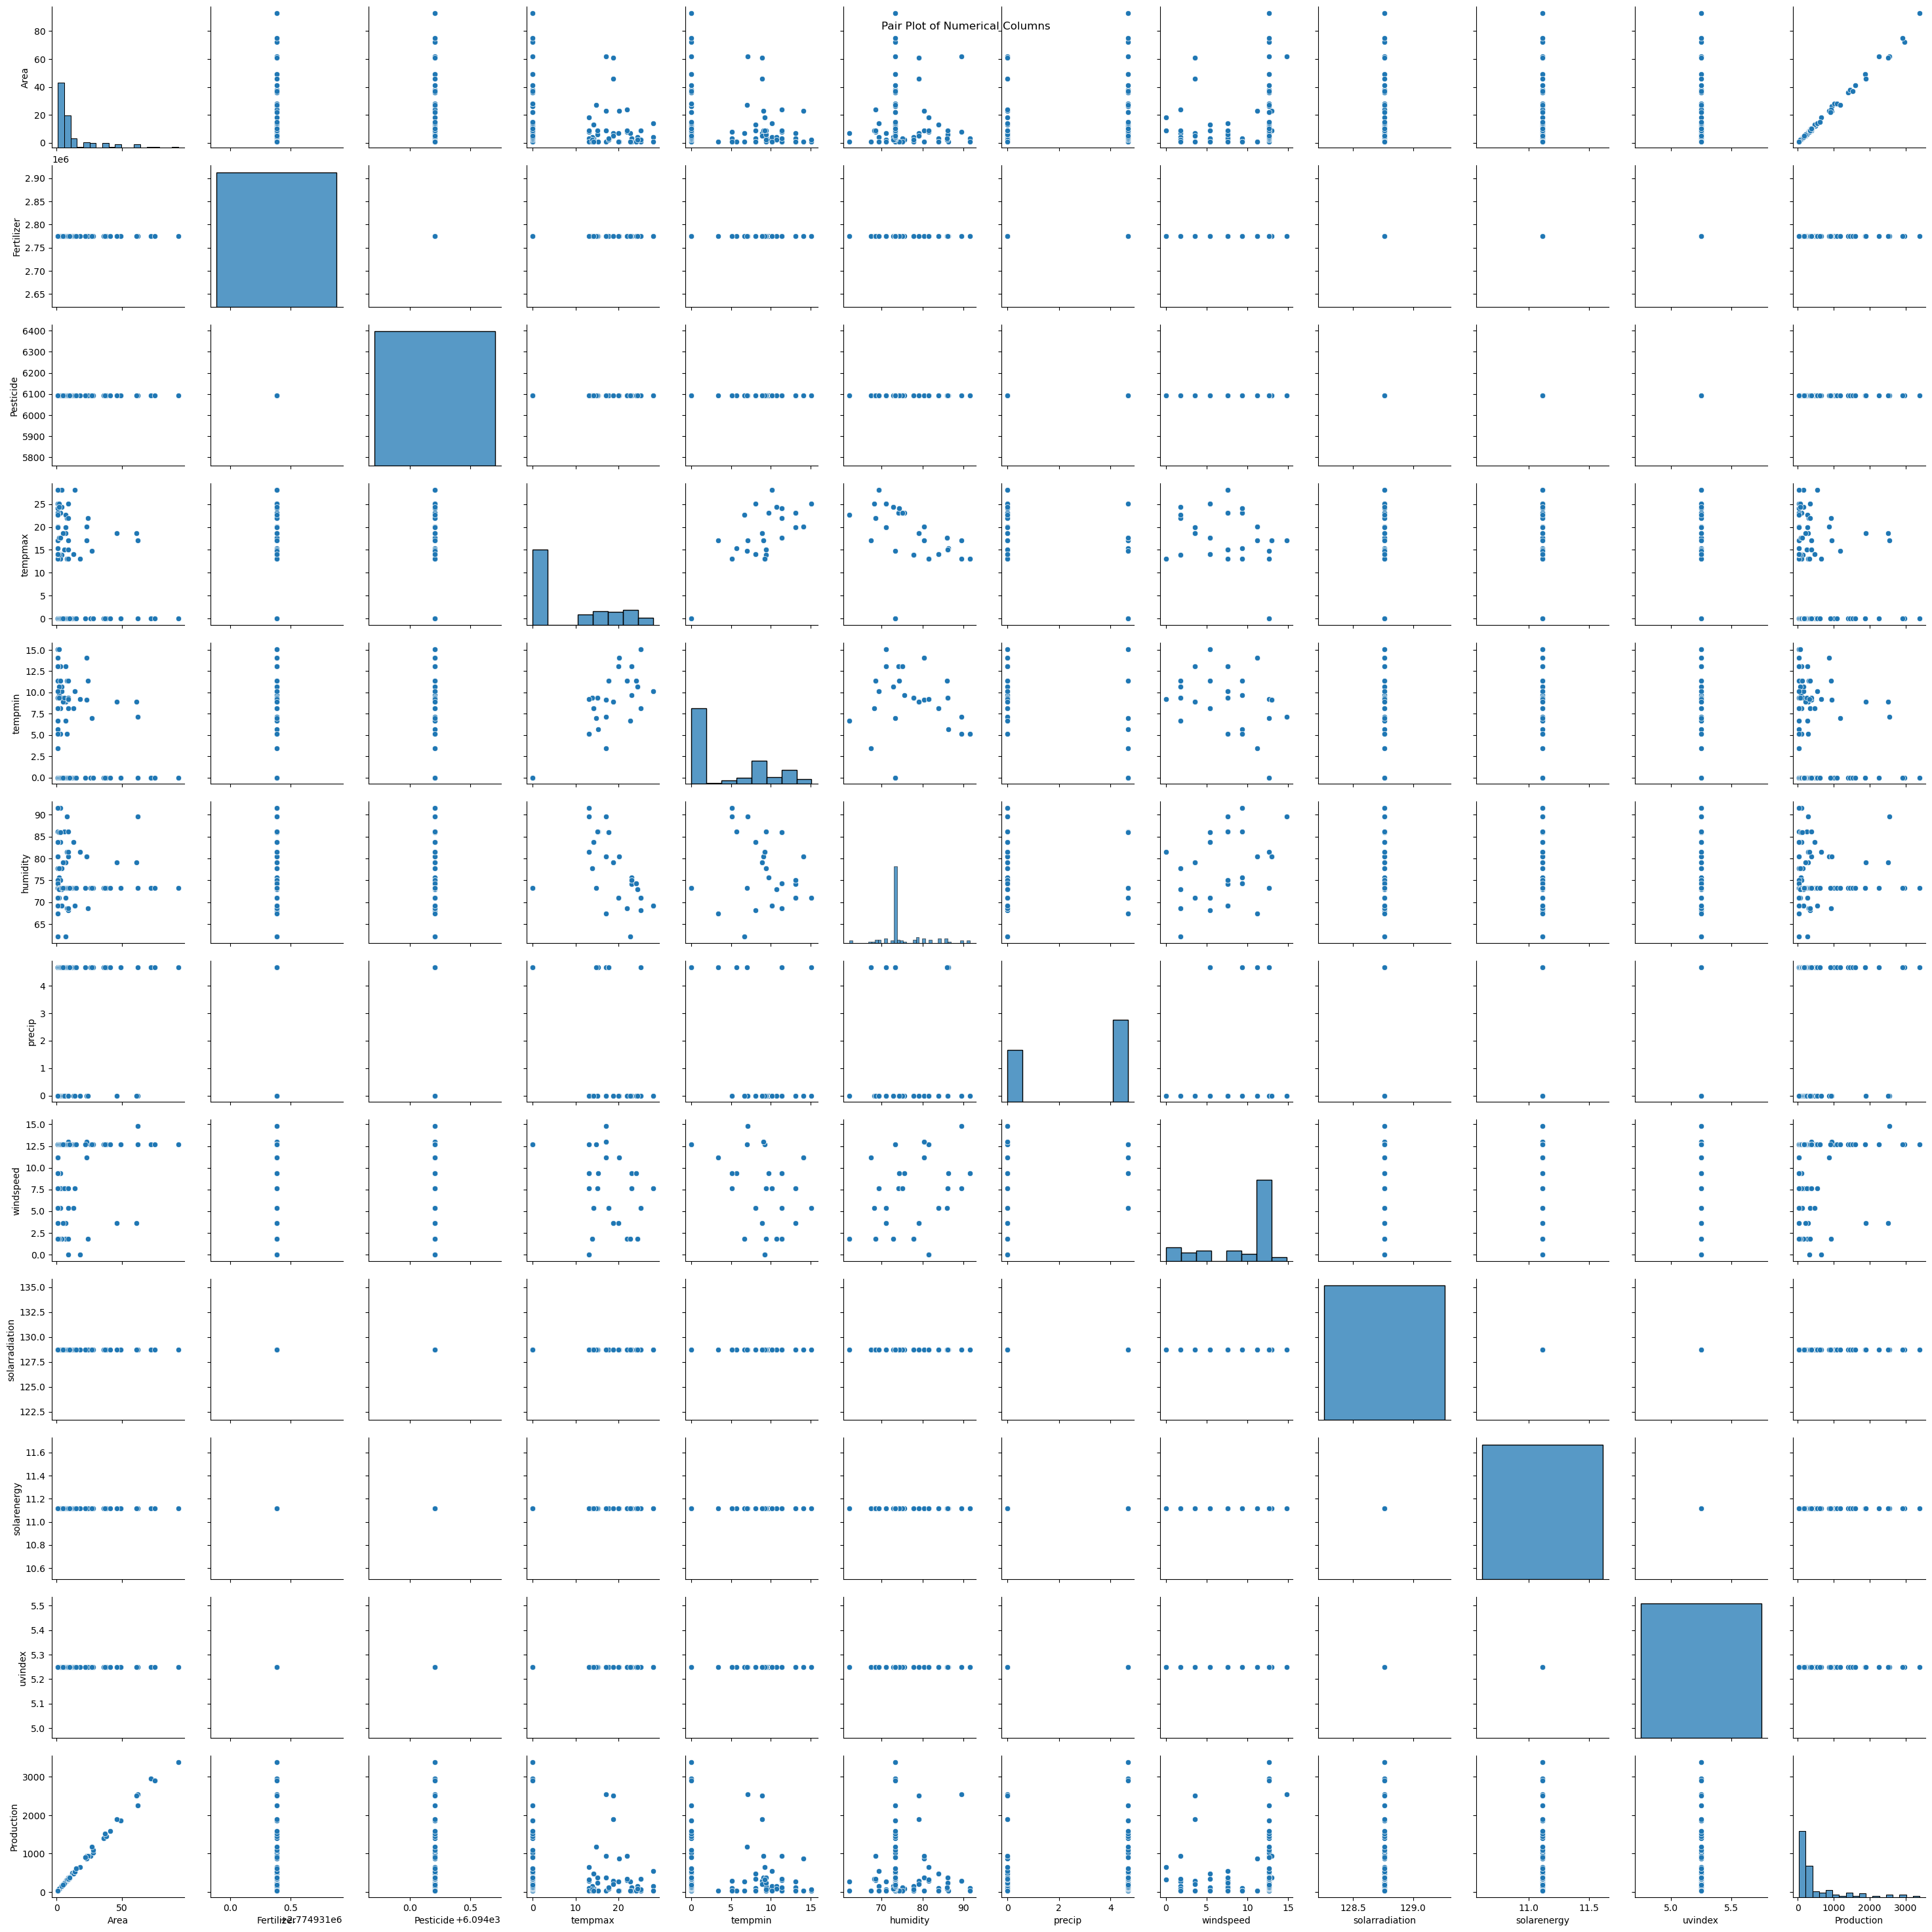

In [36]:
# Pair plot
sns.pairplot(Data, vars=['Area', 'Fertilizer', 'Pesticide', 'tempmax', 'tempmin', 'humidity', 'precip', 'windspeed', 'solarradiation', 'solarenergy', 'uvindex', 'Production'])
plt.suptitle('Pair Plot of Numerical Columns')
plt.show()

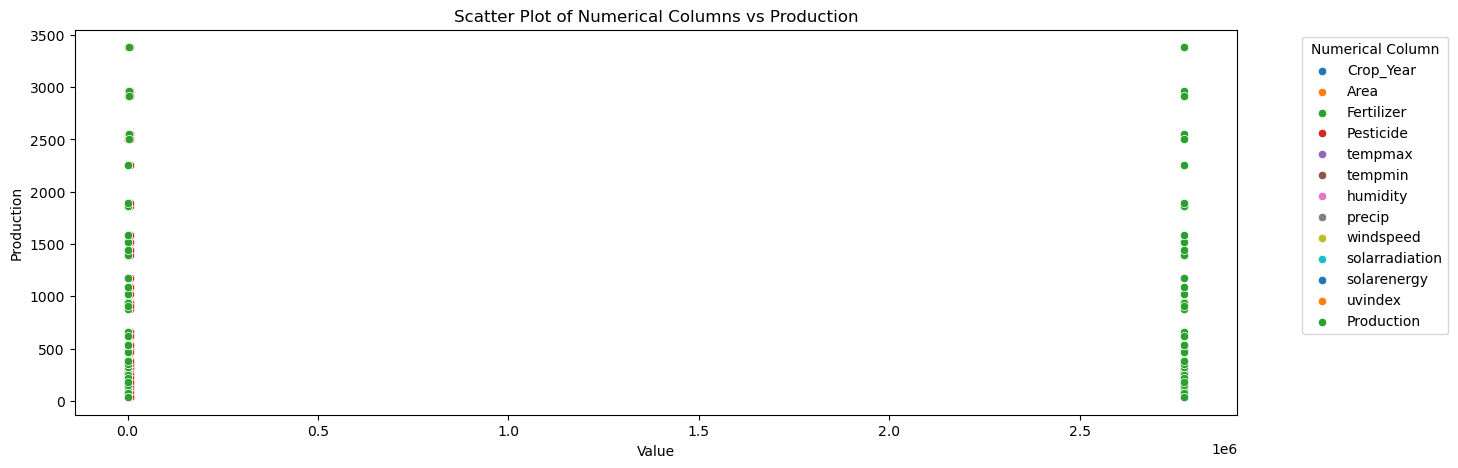

In [37]:
# Filter out numerical columns
numerical_columns = Data.select_dtypes(include=['int64', 'float64']).columns

# Define the target column
target_column = 'Production'

# Plot the scatter plot
plt.figure(figsize=(15, 5))
for column in numerical_columns:
    sns.scatterplot(x=Data[column], y=Data[target_column], label=column)

plt.title('Scatter Plot of Numerical Columns vs Production')
plt.xlabel('Value')
plt.ylabel(target_column)
plt.legend(title='Numerical Column', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

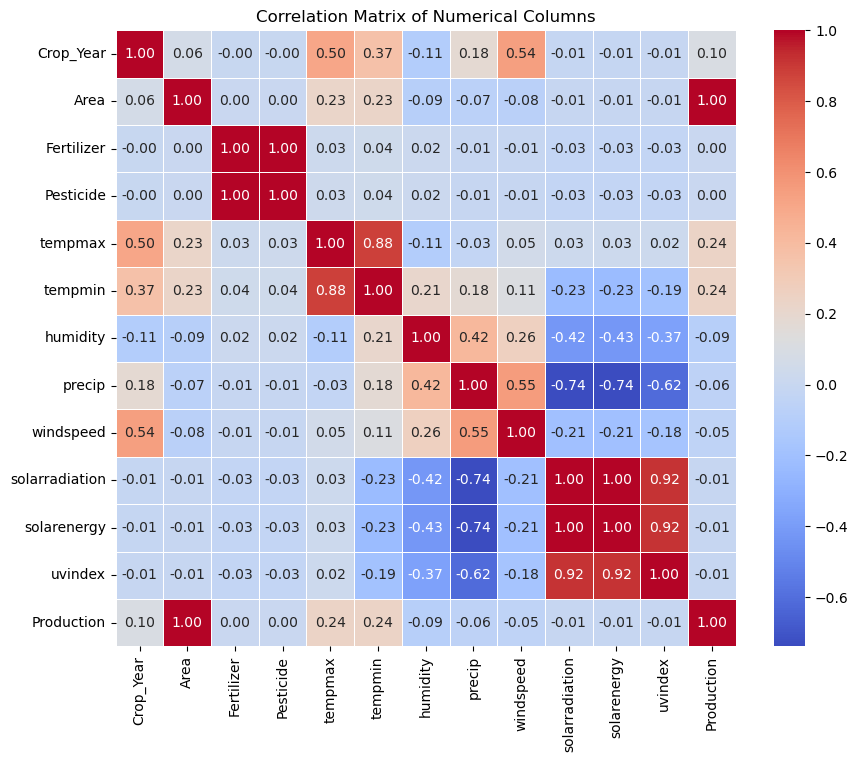

In [38]:
# Filter out numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Calculate the correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

### From above correlation matrix we can conclude that all the features are important but most important features in the dataset are "Area","solarradiation","solarenergy","uvindex","fertilizer","pesticide". and this column has postive correlation with the target variable "production" with correlation coeffient +1.00 and humidity has negative correlation coeffient with correlation coefficient -0.09.

# Standardization

In [40]:
from sklearn.preprocessing import StandardScaler

# Filter out non-numeric columns
numeric_data = Data.select_dtypes(include=['int64', 'float64'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
data_standardized = scaler.fit_transform(numeric_data)

# Convert the scaled data back to DataFrame
data_standardized = pd.DataFrame(data_standardized, columns=numeric_data.columns)


# Normalization

In [41]:
from sklearn.preprocessing import MinMaxScaler

# Filter out non-numeric columns
numeric_data = Data.select_dtypes(include=['int64', 'float64'])

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
data_normalized = scaler.fit_transform(numeric_data)

# Convert the scaled data back to DataFrame
data_normalized = pd.DataFrame(data_normalized, columns=numeric_data.columns)


# Data splitting

In [42]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
X_train

State_Name    District_Name  Crop_Year       Season    Crop  Area  \
44   Uttar Pradesh        BARABANKI       2006  Whole Year   Banana     4   
184  Uttar Pradesh         MIRZAPUR       2005  Whole Year   Banana     1   
75   Uttar Pradesh         FAIZABAD       2006  Whole Year   Banana     1   
64   Uttar Pradesh             ETAH       2004  Whole Year   Banana     9   
154  Uttar Pradesh          LUCKNOW       2004  Whole Year   Banana    13   
..             ...              ...        ...          ...     ...   ...   
252  Uttar Pradesh          SITAPUR       2008  Summer       Banana    14   
43   Uttar Pradesh        BARABANKI       2004  Whole Year   Banana     3   
232  Uttar Pradesh     SHAHJAHANPUR       2009  Summer       Banana     9   
137  Uttar Pradesh            KHERI       2005  Whole Year   Banana    49   
247  Uttar Pradesh  SIDDHARTH NAGAR       2009  Summer       Banana    46   

       Fertilizer    Pesticide  tempmax  tempmin   humidity    precip  \
44   2.774931e+06  6094.207143     28.1     10.1  69.300000  0.000000   
184  2.774931e+06  6094.207143     23.1     13.1  75.100000  0.000000   
75   2.774931e+06  6094.207143      0.0      0.0  73.328191  4.681556   
64   2.774931e+06  6094.207143      0.0      0.0  73.328191  4.681556   
154  2.774931e+06  6094.207143     14.1      8.1  83.800000  0.000000   
..            ...          ...      ...      ...        ...       ...   
252  2.774931e+06  6094.207143      0.0      0.0  73.328191  4.681556   
43   2.774931e+06  6094.207143     14.1      8.1  83.800000  0.000000   
232  2.774931e+06  6094.207143     15.1      9.4  86.100000  0.000000   
137  2.774931e+06  6094.207143      0.0      0.0  73.328191  4.681556   
247  2.774931e+06  6094.207143     18.7      8.9  79.100000  0.000000   

     windspeed  solarradiation  solarenergy   uvindex  
44    7.600000      128.761468    11.116514  5.247706  
184   7.600000      128.761468    11.116514  5.247706  
75   12.666667      128.761468    11.116514  5.247706  
64   12.666667      128.761468    11.116514  5.247706  
154   5.400000      128.761468    11.116514  5.247706  
..         ...             ...          ...       ...  
252  12.666667      128.761468    11.116514  5.247706  
43    5.400000      128.761468    11.116514  5.247706  
232   7.600000      128.761468    11.116514  5.247706  
137  12.666667      128.761468    11.116514  5.247706  
247   3.600000      128.761468    11.116514  5.247706  

[92 rows x 16 columns]

In [44]:
y_train

44      155
184      38
75       39
64      328
154     473
       ... 
252     534
43      109
232     370
137    1867
247    1892
Name: Production, Length: 92, dtype: int64

In [45]:
X_test

State_Name      District_Name  Crop_Year       Season    Crop  Area  \
213  Uttar Pradesh         RAE BARELI       2004  Whole Year   Banana     1   
23   Uttar Pradesh           AZAMGARH       2004  Whole Year   Banana     8   
115  Uttar Pradesh            JAUNPUR       2005  Whole Year   Banana     3   
113  Uttar Pradesh             JALAUN       2009  Summer       Banana     1   
31   Uttar Pradesh           BAHRAICH       2008  Summer       Banana    38   
123  Uttar Pradesh       KANPUR DEHAT       2005  Whole Year   Banana     1   
260  Uttar Pradesh          SULTANPUR       2006  Whole Year   Banana     9   
82   Uttar Pradesh        FARRUKHABAD       2009  Summer       Banana    22   
188  Uttar Pradesh          MORADABAD       2004  Whole Year   Banana     2   
32   Uttar Pradesh           BAHRAICH       2009  Summer       Banana    72   
121  Uttar Pradesh            KANNAUJ       2009  Summer       Banana     2   
66   Uttar Pradesh               ETAH       2006  Whole Year   Banana     8   
236  Uttar Pradesh          SHRAVASTI       2005  Whole Year   Banana     4   
139  Uttar Pradesh              KHERI       2008  Summer       Banana    49   
52   Uttar Pradesh              BASTI       2006  Whole Year   Banana     8   
14   Uttar Pradesh     AMBEDKAR NAGAR       2009  Summer       Banana     6   
155  Uttar Pradesh            LUCKNOW       2005  Whole Year   Banana    23   
216  Uttar Pradesh         RAE BARELI       2009  Summer       Banana     9   
259  Uttar Pradesh          SULTANPUR       2005  Whole Year   Banana    10   
245  Uttar Pradesh    SIDDHARTH NAGAR       2006  Whole Year   Banana     9   
235  Uttar Pradesh          SHRAVASTI       2004  Whole Year   Banana     6   
223  Uttar Pradesh  SANT KABEER NAGAR       2006  Whole Year   Banana    24   
183  Uttar Pradesh           MIRZAPUR       2004  Whole Year   Banana     1   
37   Uttar Pradesh             BALLIA       2009  Summer       Banana     4   

       Fertilizer    Pesticide  tempmax  tempmin   humidity    precip  \
213  2.774931e+06  6094.207143     14.1      8.1  83.800000  0.000000   
23   2.774931e+06  6094.207143     13.1      5.1  89.500000  0.000000   
115  2.774931e+06  6094.207143     23.1     13.1  75.100000  0.000000   
113  2.774931e+06  6094.207143      0.0      0.0  73.328191  4.681556   
31   2.774931e+06  6094.207143      0.0      0.0  73.328191  4.681556   
123  2.774931e+06  6094.207143      0.0      0.0  73.328191  4.681556   
260  2.774931e+06  6094.207143      0.0      0.0  73.328191  4.681556   
82   2.774931e+06  6094.207143      0.0      0.0  73.328191  4.681556   
188  2.774931e+06  6094.207143      0.0      0.0  73.328191  4.681556   
32   2.774931e+06  6094.207143      0.0      0.0  73.328191  4.681556   
121  2.774931e+06  6094.207143      0.0      0.0  73.328191  4.681556   
66   2.774931e+06  6094.207143      0.0      0.0  73.328191  4.681556   
236  2.774931e+06  6094.207143      0.0      0.0  73.328191  4.681556   
139  2.774931e+06  6094.207143      0.0      0.0  73.328191  4.681556   
52   2.774931e+06  6094.207143     21.9     11.4  68.600000  0.000000   
14   2.774931e+06  6094.207143     18.7      8.9  79.100000  0.000000   
155  2.774931e+06  6094.207143     20.1     14.1  80.400000  0.000000   
216  2.774931e+06  6094.207143     17.1      9.1  80.400000  0.000000   
259  2.774931e+06  6094.207143      0.0      0.0  73.328191  4.681556   
245  2.774931e+06  6094.207143     21.9     11.4  68.600000  0.000000   
235  2.774931e+06  6094.207143      0.0      0.0  73.328191  4.681556   
223  2.774931e+06  6094.207143     21.9     11.4  68.600000  0.000000   
183  2.774931e+06  6094.207143     13.1      5.1  91.500000  0.000000   
37   2.774931e+06  6094.207143      0.0      0.0  73.328191  4.681556   

     windspeed  solarradiation  solarenergy   uvindex  
213   5.400000      128.761468    11.116514  5.247706  
23    7.600000      128.761468    11.116514  5.247706  
115   7.600000      128.761468    11.1

In [46]:
y_test

213      36
23      291
115     114
113      41
31     1448
123      38
260     349
82      905
188      73
32     2961
121      83
66      310
236     153
139    1867
52      311
14      246
155     876
216     370
259     381
245     349
235     218
223     932
183      36
37      165
Name: Production, dtype: int64

# Model building (By using different algorithm)

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd


In [48]:
# Split the data into features and target variable
X = Data.drop(columns=['Production'])
y = Data['Production']

# Define categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Define numerical columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Preprocess categorical variables using OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ],
    remainder='passthrough'
)

# Random forest

In [50]:
# Apply preprocessing and train the model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

pipeline.fit(X_train, y_train)

# Prediction
y_pred_rf = pipeline.predict(X_test)

# Evaluate
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print("Random Forest Regressor:")
print(f"R2 Score: {r2_rf:.4f}")
print(f"Mean Squared Error: {mse_rf:.4f}")



Random Forest Regressor:
R2 Score: 0.9907
Mean Squared Error: 4366.9768


# Decision tree

In [51]:
# Decision Tree Regressor
dt_regressor = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

dt_regressor.fit(X_train, y_train)
y_pred_dt = dt_regressor.predict(X_test)
r2_dt = r2_score(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print("Decision Tree Regressor:")
print(f"R2 Score: {r2_dt:.4f}")
print(f"Mean Squared Error: {mse_dt:.4f}")


Decision Tree Regressor:
R2 Score: 0.9822
Mean Squared Error: 8315.8333


# Gradient Boosting Regressor

In [52]:
# Gradient Boosting Regressor
gb_regressor = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

gb_regressor.fit(X_train, y_train)
y_pred_gb = gb_regressor.predict(X_test)
r2_gb = r2_score(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
print("\nGradient Boosting Regressor:")
print(f"R2 Score: {r2_gb:.4f}")
print(f"Mean Squared Error: {mse_gb:.4f}")



Gradient Boosting Regressor:
R2 Score: 0.9992
Mean Squared Error: 376.3019


# Support vector Regressor

In [53]:
# Support Vector Regressor
svr_regressor = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', SVR())
])

svr_regressor.fit(X_train, y_train)
y_pred_svr = svr_regressor.predict(X_test)
r2_svr = r2_score(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
print("\nSupport Vector Regressor:")
print(f"R2 Score: {r2_svr:.4f}")
print(f"Mean Squared Error: {mse_svr:.4f}")


Support Vector Regressor:
R2 Score: -0.2313
Mean Squared Error: 576267.0417


# XGBoost Regressor

In [54]:
# XGBoost Regressor
xgb_regressor = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42))
])

xgb_regressor.fit(X_train, y_train)
y_pred_xgb = xgb_regressor.predict(X_test)
r2_xgb = r2_score(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print("XGBoost Regressor:")
print(f"R2 Score: {r2_xgb:.4f}")
print(f"Mean Squared Error: {mse_xgb:.4f}")

XGBoost Regressor:
R2 Score: 0.9804
Mean Squared Error: 9171.7114


In [62]:
final_data=pd.DataFrame({"models":["RF","DT","GB","SVR","XGB"],
                        "R2 Score":[r2_rf,
                                   r2_dt,
                                   r2_gb,
                                   r2_svr,
                                   r2_xgb ]})
final_data


models  R2 Score
0     RF  0.990669
1     DT  0.982231
2     GB  0.999196
3    SVR -0.231343
4    XGB  0.980402

<AxesSubplot:xlabel='models', ylabel='R2 Score'>

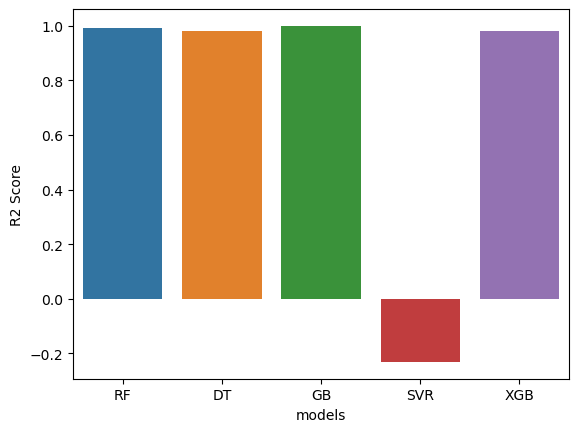

In [63]:
import seaborn as sns
sns.barplot(final_data["models"],final_data["R2 Score"])

### #From the above algorithms we used  here, 'Random Forest' and 'Gradient boosting Regressor' have maximum R Score and accuracy so we can train our model on 'Random Forest'.

# Graphical user interface(GUI)

In [55]:
import tkinter as tk
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv('Crop Yield.csv')  # Replace 'Crop Yield.csv' with your actual dataset file path

# Extract numerical features and target variable
X = data[['Crop_Year', 'Area', 'Fertilizer', 'Pesticide', 'tempmax', 'tempmin', 'humidity', 'precip', 'windspeed', 'solarradiation', 'solarenergy', 'uvindex']]  
y = data['Production']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Train the regression model
model = RandomForestRegressor()  
model.fit(X, y)  

def predict_yield():
    try:
        # Get user input
        user_input = []
        for entry in entries:
            user_input.append(float(entry.get()))
        
        # Perform prediction
        predicted_yield = model.predict([user_input])[0]
        
        # Display prediction
        result_label.config(text=f"The predicted yield is {predicted_yield:.2f}")
    except ValueError as e:
        error_label.config(text=str(e))

# Create GUI window
window = tk.Tk()
window.title("Crop Yield Prediction")

# Create labels and entry fields for numerical user input
labels = ['Crop_Year', 'Area', 'Fertilizer', 'Pesticide', 'tempmax', 'tempmin', 'humidity', 'precip', 'windspeed', 'solarradiation', 'solarenergy', 'uvindex']  

entries = []
for i, label_text in enumerate(labels):
    tk.Label(window, text=label_text).grid(row=i, column=0)
    entry = tk.Entry(window)
    entry.grid(row=i, column=1)
    entries.append(entry)

# Create a button to trigger prediction
predict_button = tk.Button(window, text="Predict Yield", command=predict_yield)
predict_button.grid(row=len(labels), columnspan=2)

# Label to display prediction result or error message
result_label = tk.Label(window, text="")
result_label.grid(row=len(labels)+1, columnspan=2)

# Label to display error message
error_label = tk.Label(window, text="", fg="red")
error_label.grid(row=len(labels)+2, columnspan=2)

window.mainloop()


In [64]:
import pickle

In [65]:
filename = 'trained_model.sav'
pickle.dump(r2_rf, open(filename, 'wb'))


In [66]:
loaded_model = pickle.load(open( 'trained_model.sav' , 'rb'))